<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 20px 5px 0px 5px; 
            border: 10px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"
          
 <font color='blue'>**Trefethen p01 to p14**.
 
 This notebook showcases the first fourteen problems in Trefethen's classic book _Spectral Methods in MATLAB_. These problems have been ported to Python by Praveen Chandrashekar. Later problems in the set will have been ported to Python by Orlando Camargo Rodríguez. <br><br>
 
 

    
</font>
</div>



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 1: Convergence of fourth order finite differences 

 For $j\,=\,1, 2, \ldots, N$:

- Let $p_j$ be the unique polynomial of degree $\le$ 4 with $p_j(x_{j\pm2})\,=\,u_{j\pm2}$, $\hspace{.3 cm}p_j(x_{j\pm 1})\,=\,u_{j\pm 1},\hspace{.3 cm}$ and $\hspace{.2 cm}p_j(x_j)\,=\,u_j$.

- Set $w_j\,=\,p'_{j}(x_j)$.

$$\begin{pmatrix}
w_{1}\\
{ }\\
{ }\\
{\vdots}\\
{ }\\
{ }\\
w_{n}\\
\end{pmatrix}\:\: \,=\,h^{-1}\:\begin{pmatrix}
\hspace{2 cm}{\ddots}\hspace{1.4 cm}{\frac{1}{12}}\:-\frac{2}{3}\\
\hspace{2 cm}{\ddots}-\hspace{-1 mm}\frac{1}{12}\hspace{1.4 cm}\frac{1}{12}\\
\hspace{1 cm}{\ddots}\:\frac{2}{3}\:{\ddots}\hspace{1 cm}\\
\hspace{1 cm}{\ddots}\:0\:{\ddots}\hspace{1 cm}\\
\hspace{1 cm}{\ddots}-\hspace{-1.5 mm}\frac{2}{3}\:{\ddots}\hspace{1 cm}\\
\hspace{-.75 cm}-\frac{1}{12}\hspace{1.8 cm}\frac{1}{12}\:{\ddots}\hspace{1 cm}\\
\hspace{-.4 cm}\frac{2}{3}-\frac{1}{12}\hspace{1.4 cm}{\ddots}\hspace{1 cm}\\
\end{pmatrix}
\hspace{.3 cm}
\begin{pmatrix}
u_{1}\\
{ }\\
{ }\\
{\vdots}\\
{ }\\
{ }\\
u_{n}\\
\end{pmatrix}$$

The matrix system illustrated above is an example of _differentiation matrices_. They have order of accuracy 4. That is, for data $u_j$ obtained by sampling a sufficiently smooth function $u$, the corresponding discrete approximations to $u'(x_j)$ will converge at the rate $O(h^4)$ as $h\rightarrow0$. One can verify this by considering Taylor series.


   


</font>
</div>


<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Compute the derivative of
$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$
using fourth order finite difference scheme
$$
u'(x_j) \approx w_j = \frac{1}{h} \left( \frac{1}{12} u_{j-2} - \frac{2}{3} u_{j-1} + \frac{2}{3} u_{j+1} - \frac{1}{12} u_{j+2} \right)
$$
using periodic boundary conditions.
</font>
</div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.sparse import coo_matrix
from numpy import arange,pi,exp,sin,cos,ones,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,semilogy,text,grid,xlabel,ylabel,title



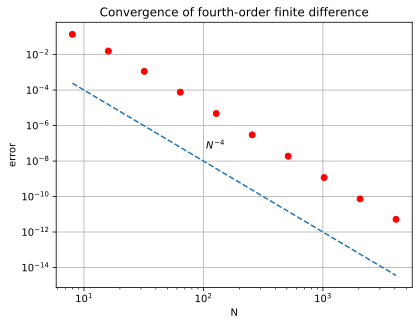

In [2]:
Nvec = 2**arange(3,13)
for N in Nvec:
    h = 2*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u
    e = ones(N)
    e1 = arange(0,N)
    e2 = arange(1,N+1); e2[N-1]=0
    e3 = arange(2,N+2); e3[N-2]=0; e3[N-1]=1;
    D = coo_matrix((2*e/3,(e1,e2)),shape=(N,N)) \
        - coo_matrix((e/12,(e1,e3)),shape=(N,N))
    D = (D - D.T)/h
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    #hold(True)
    
semilogy(Nvec,Nvec**(-4.0),'--')
text(105,5e-8,'$N^{-4}$')
grid(True)
xlabel('N')
ylabel('error')
title('Convergence of fourth-order finite difference');



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 1. Fourth-order convergence of the finite difference differentiation process. The use of sparse matrices permits high values of $N$.


</font>
</div>


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 2 : Convergence of spectral method in a _**periodic**_ domain.


</font>
</div>


<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Repeat Program 1 using the periodic spectral method to compute the derivative of

$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$
</font>
</div>

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.linalg import toeplitz
from numpy import pi,arange,exp,sin,cos,zeros,tan,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,grid,xlabel,ylabel



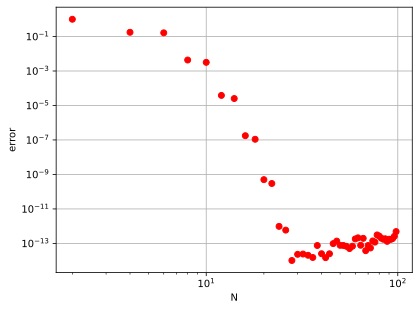

In [5]:
figure()
for N in range(2,100,2):
    h = 2.0*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u #Exact derivative
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N); row[0] = col[0]; row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    
grid(True)
xlabel('N')
ylabel('error');



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 2. "Spectral accuracy" of the spectral method, until the rounding errors take over around $10^{14}$. Now the matrices are dense, but the values of $N$ are much smaller than in Program 1.

Notes applicable to Program 1 and 2: The fundamental principle of spectral collocation methods is, given discrete data on a grid, to interpolate the data globally, then evaluate the derivative of the interpolant on the grid. For periodic problems, trigonometric interpolants in equispaced points are normally used, and for nonperiodic problems, polynomial interpolants in unevenly spaced points are normally used.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 3 : Band-limited interpolation.

Differentiation matrix sets can be put together based on the key ideas of the semidiscrete Fourier transform and band-limited $\:sinc\:$ function interpolation. Before discretizing, the continuous case should be reviewed. The _Fourier transform_ of a function $u(x),\,x\,\in\,\mathbb{R},\,$ is the function $\hat{u}(k)$ defined by

$$\hat{u}(k)\,=\,\int_{-\infty}^{\infty}e^{-ikx} u(x)\: dx, \:\:k\in \mathbb{R}$$

The number $\hat{u}(k)\,$ can be interpreted as the amplitude density of $u$ at wavenumber $k$, and this process of decomposing a function into its constituent waves is called _Fourier analysis_.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Interpolate the following functions using band limited interpolation on an infinite grid.

Delta function
$$
v(x) = \begin{cases}
1 & x =0 \\
0 & otherwise
\end{cases}
$$

Square wave
$$
v(x) = \begin{cases}
1 & |x| \le 3 \\
0 & otherwise
\end{cases}
$$

Hat function
$$
v(x) = \max(0, 1-|x|/3)
$$

Since all functions are zero away from origin, restrict them to some finite interval, say $[-10,10]$.
</font>
</div>

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import arange,maximum,abs,zeros,sin,pi
from matplotlib.pyplot import subplot,figure,plot,grid,axis



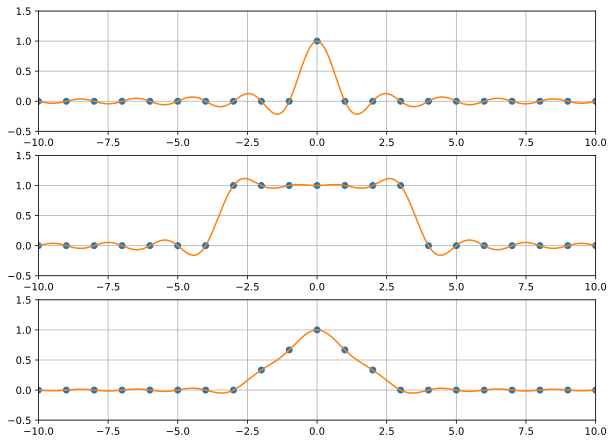

In [7]:
h = 1.0;
xmax = 10.0;
x = arange(-xmax,xmax+h,h)
xx = arange(-xmax-h/20, xmax+h/20, h/10)
figure(figsize=(10,10))
for pl in range(3):
    subplot(4,1,pl+1)
    if pl==0:
        v = (x==0)                      # delta function
    elif pl==1:
        v = (abs(x) <= 3.0)             # square wave
    else:
        v = maximum(0.0,1.0-abs(x)/3.0) # hat function
    plot(x,v,'o')
    grid(True)
    p = zeros(len(xx))
    for i in range(len(x)):
        p = p + v[i]*sin(pi*(xx-x[i])/h)/(pi*(xx-x[i])/h)
    plot(xx,p)
    axis([-xmax,xmax,-0.5,1.5]);
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 3. Band-limited interpolation of three grid functions; the first interpolant is the $\:sinc\:$ function $\:S_h(x)$. Such interpolants are the basis of spectral methods, but these examples are not smooth enough for high accuracy.



</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 4 : Periodic spectral differentiation



</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Compute derivatives of following periodic functions on a finite interval

$$
v(x) = \max(0, 1-|x-\pi|/2), \qquad x \in [0,2\pi]
$$
and
$$
v(x) = \exp(\sin(x)), \qquad x \in [0,2\pi]
$$


</font>
</div>

In [8]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,inf,linspace,zeros,arange,sin,cos,tan,exp,maximum,abs
from numpy.linalg import norm
from scipy.linalg import toeplitz
from matplotlib.pyplot import figure,subplot,plot,axis,title,text



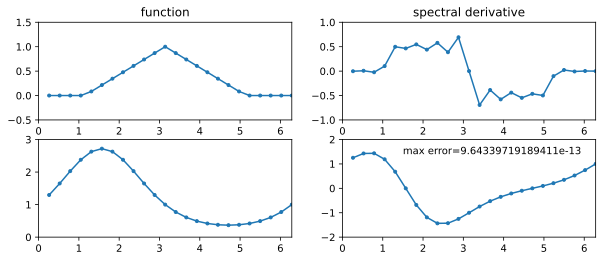

In [9]:
# Set up grid and differentiation matrix:
N = 24; h = 2*pi/N; x = h*arange(1,N+1);
col = zeros(N)
col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
row = zeros(N)
row[0] = col[0]
row[1:] = col[N-1:0:-1]
D = toeplitz(col,row)

figure(figsize=(10,6))

# Differentiation of a hat function:
v = maximum(0,1-abs(x-pi)/2)
subplot(3,2,1)
plot(x,v,'.-')
axis([0, 2*pi, -.5, 1.5])
title('function')
subplot(3,2,2)
plot(x,D.dot(v),'.-')
axis([0, 2*pi, -1, 1])
title('spectral derivative')

# Differentiation of exp(sin(x)):
v = exp(sin(x)); vprime = cos(x)*v;
subplot(3,2,3)
plot(x,v,'.-')
axis([0, 2*pi, 0, 3])
subplot(3,2,4)
plot(x,D.dot(v),'.-')
axis([0, 2*pi, -2, 2])
error = norm(D.dot(v)-vprime,inf)
text(1.5,1.4,"max error="+str(error));



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Relevant comments pertaining to Program 4. A function $v$ on the grid $\:h\mathbb{Z}\:$ has a unique interpolant $p$ that is band-limited to wavenumbers in the interval $\:[-\pi/h, \pi/h]\:$. Computing $\,p'\,$ on the grid can be done by evaluating the inverse semidiscrete Fourier transform of $\,ikv\,$, or alternatively, as a linear combination of derivatives of translates of $\:sinc\:$ functions.



</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 5 : Repetition of Program 4 via FFT

Next up will be spectral differentiation on a bounded, periodic grid. The basic periodic grid considered will be a subset of the interval $\:[0,2\pi]\:.$ Throughout the problem set, the number of grid points on a periodic grid will always be even. The spacing of the grid points will be $\,h\,=\,2\pi/N\,$, which gives

$$\frac{h}{\pi}\,=\,\frac{N}{2}$$

The formula for the Discrete Fourier Transform is

$$\hat{v}_k\,=\,h\,\sum_{j=1}^N e^{-ikx_j}\,v_j,\:\:k\,=\,\scriptsize{-\frac{N}{2}\,+\,1, \ldots,\,\frac{N}{2}}$$

and the formula for the Inverse DFT is

$${v}_j\,=\,\frac{1}{2\pi}\,\sum_{k=-N/2\,+\,1}^{N/2} e^{ikx_j}\,\hat{v}_k,\:\:j\,=\,\scriptsize{1, \ldots,N}.$$


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Using the _differentiation matrix_


$$D_N\:=\:
\begin{pmatrix}
 0\hspace{5 cm}-{\frac{1}{2}}\,\textrm{cot}\frac{1h}{2}\\
-{\frac{1}{2}}\,\textrm{cot}\frac{1h}{2}\hspace{.7 cm}\ddots\hspace{1.7 cm}\ddots\hspace{.7 cm}{\frac{1}{2}}\,\textrm{cot}\frac{2h}{2}\\
{\frac{1}{2}}\,\textrm{cot}\frac{2h}{2}\hspace{2 cm}\ddots\hspace{1.7 cm}-{\frac{1}{2}}\,\textrm{cot}\frac{3h}{2}\\
\hspace{-1.3 cm}{-\frac{1}{2}}\,\textrm{cot}\frac{3h}{2}\hspace{2.5 cm}\ddots\hspace{1.7 cm}\vdots\\
\vdots\hspace{1.7 cm}\ddots\hspace{1.7 cm}\ddots\hspace{.7 cm}{\frac{1}{2}}\,\textrm{cot}\frac{1h}{2}\\
\hspace{-1 cm}{\frac{1}{2}}\,\textrm{cot}\frac{1h}{2}\hspace{3.5 cm}\hspace{1.7 cm}0\\
\end{pmatrix}$$

perform a spectral differentiation of a hat function and the smooth function $\,e^{\textrm{sin}(x)}\,$ of Programs 1 and 2.



</font>
</div>

In [10]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#  For complex v, delete "real" commands.
from numpy import pi,inf,linspace,maximum,abs,zeros,arange,real,sin,cos,exp
from numpy.fft import fft,ifft
from numpy.linalg import norm
from matplotlib.pyplot import figure,subplot,plot,axis,title,text



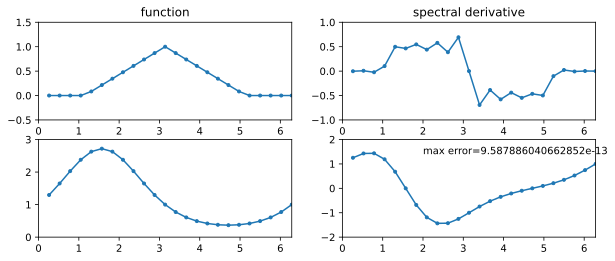

In [11]:
# Set up grid and differentiation matrix:
N = 24; h = 2*pi/N; x = h*arange(1,N+1);

# Differentiation of a hat function:
v = maximum(0.0,1.0-abs(x-pi)/2.0)
v_hat = fft(v)
w_hat = 1j*zeros(N)
w_hat[0:N//2] = 1j*arange(0,N//2)
w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
w_hat = w_hat * v_hat
w = real(ifft(w_hat))

figure(figsize=(10,6))

subplot(3,2,1)
plot(x,v,'.-')
axis([0, 2*pi, -.5, 1.5])
title('function')
subplot(3,2,2)
plot(x,w,'.-')
axis([0, 2*pi, -1, 1])
title('spectral derivative')

# Differentiation of exp(sin(x)):
v = exp(sin(x)); vprime = cos(x)*v;
v_hat = fft(v)
w_hat = 1j*zeros(N)
w_hat[0:N//2] = 1j*arange(0,N//2)
w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
w_hat = w_hat * v_hat
w = real(ifft(w_hat))
subplot(3,2,3)
plot(x,v,'.-')
axis([0, 2*pi, 0, 3])
subplot(3,2,4)
plot(x,w,'.-')
axis([0, 2*pi, -2, 2])
error = norm(w-vprime,inf)
text(2.0,1.4,"max error="+str(error));



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 5. The accuracy of the hat function is poor, because the function is not smooth, but the accuracy for $\,e^{\textrm{sin}(x)}\,$ is outstanding.

</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 6 : Variable coefficient wave equation

Program 6 has the complication that the leap frog scheme requires two initial conditions to start, whereas the PDE provides only one. To obtain a starting value $\,v^{(-1)}\,$, this particular program extrapolates backwards with the assumption of a constant wave speed of $\,\frac{1}{5}\,$. This approximation introduces a small error. For more serious work one could use one or more steps of a one-step ordinary differential equation (ODE) formula, such as a Runge-Kutta formula, to generate the necessary second set of initial data at $\,t\,=\,-\Delta t\,$ or $\,t\,=\,\Delta t\,$.


</font>
</div>

In [12]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from numpy import pi,linspace,sin,exp,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure



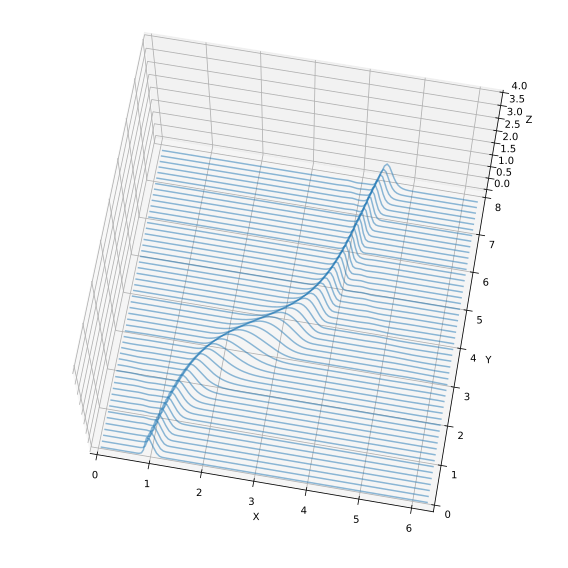

In [13]:
# Set up grid and differentiation matrix:
N = 128; h = 2*pi/N; x = h*arange(1,N+1);
t = 0.0; dt = h/4.0
c = 0.2 + sin(x-1.0)**2.0
v = exp(-100.0*(x-1.0)**2.0); vold = exp(-100.0*(x-0.2*dt-1.0)**2.0);

# Time-stepping by leap-frog formula
tmax = 8.0; tplot = 0.15;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))
data = []
data.append(list(zip(x, v)))
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        v_hat = fft(v)
        w_hat = 1j*zeros(N)
        w_hat[0:N//2] = 1j*arange(0,N//2)
        w_hat[N//2+1:] = 1j*arange(-N//2+1,0,1)
        w_hat = w_hat * v_hat
        w = real(ifft(w_hat))
        vnew = vold - 2.0*dt*c*w
        vold = v; v = vnew;
    data.append(list(zip(x, v)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(data)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(0, 2*pi)
ax.set_ylabel('Y')
ax.set_ylim3d(0, 8)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 4)
ax.view_init(70,-80)



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Relevant comments pertaining to Program 5 and 6. Mathematically, a periodic grid is much like an infinite grid, with the semidiscrete Fourier transform replaced by the DFT and the $\,sinc\,$ function $\,S_h\,$ replaced by the periodic $\,sinc\,$ function $\,S_N\,$. The band-limited interpolant of a grid function is a trigonometric polynomial. Spectral derivatives can be calculated by a differentiation matrix in $\,O(N^2)\,$ or by the FFT in $\,O(N \textrm{log} N)\,$ floating point operations.



</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 7 : Accuracy of periodic spectral differentiation

Spectral methods are applicable to piecewise continuous functions as well as smoothly continuous ones. Differences in handling the different situations depends on the behavior of the Fourier transform.

Info concerning the four periodic functions considered by the following code: The first has a third derivative of bounded variation, the second is smooth but not analytic, the third is analytic in a strip in the complex plane, and the fourth is band-limited. 

</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Examples of function applicability and behavior

Illustrate varying convergence rates in the spectral derivatives of four periodic functions:

$|\textrm{sin}\,x|^3,\:\textrm{exp}(-\textrm{sin}^{-2}(x/2)),\:1/(1+\textrm{sin}^2(x/2)),\,$ and $\textrm{sin}(10x)$.

Calculate the $\,\infty$-norm of the error in the spectral derivative for various step sizes.




</font>
</div>

In [15]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,tan,sin,cos,exp,abs,dot
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis



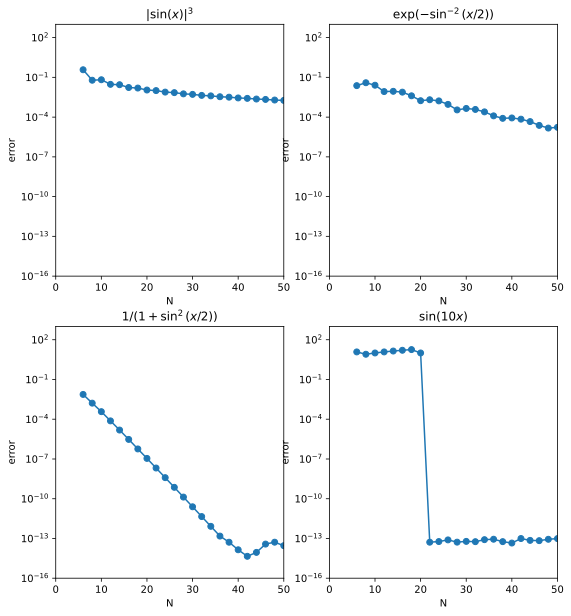

In [16]:
# Set up grid and differentiation matrix:
Nmax = 50
E = zeros((4,Nmax//2-2))
for N in range(6,Nmax+1,2):
    h = 2.0*pi/N; x = h*linspace(1,N,N);
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N)
    row[0] = col[0]
    row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    
    v = abs(sin(x))**3
    vprime = 3.0*sin(x)*cos(x)*abs(sin(x))
    E[0][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-sin(x/2)**(-2))   # C-infinity
    vprime = 0.5*v*sin(x)/sin(x/2)**4
    E[1][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+sin(x/2)**2)     # analytic in a strip
    vprime = -sin(x/2)*cos(x/2)*v**2
    E[2][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = sin(10*x)
    vprime = 10*cos(10*x)   # band-limited
    E[3][N//2-3] = norm(dot(D,v)-vprime,inf)


titles = ["$|\sin(x)|^3$", "$\exp(-\sin^{-2}(x/2))$", \
          "$1/(1+\sin^2(x/2))$", "$\sin(10x)$"]
figure(figsize=(9,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(6,Nmax+1,2),E[iplot][:],'o-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 7. Error as a function of $N$ in the spectral derivatives of four periodic functions. The smoother the function, the faster the convergence.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 8 : Eigenvalues of the harmonic oscillator

Consider the problem of finding values of $\,\lambda\,$ such that

$$-u''\,+\,x^2u\,=\,\lambda u, \hspace{1 cm} x\,\in\,\mathbb{R}$$

for some $\,u\,\ne \,0$. This is the problem of a quantum oscillator, whose exact eigenvalues are $\,\lambda \,=\,1, 3, 5, \ldots ,\,$ and the eigenfunctions $\,u\,$ are Hermite polynomials multiplied by decreasing exponentials, $\,e^{-x^2/2\,H_n(x)}\,$ (times an arbitrary constant). Since these solutions decay rapidly, for practical computations we can truncate the infinite spatial domain to the periodic interval $\,[-L, L]\,$, provided $\,L\,$ is sufficiently large.


</font>
</div>

In [17]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,arange,linspace,sin,zeros,diag,sort
from scipy.linalg import toeplitz
from numpy.linalg import eig



In [18]:
L = 8.0
for N in range(6,37,6):
    h = 2.0*pi/N; x = h*linspace(1,N,N); x = L*(x-pi)/pi
    col = zeros(N)
    col[0] = -pi**2/(3.0*h**2) - 1.0/6.0
    col[1:] = -0.5*(-1.0)**arange(1,N)/sin(0.5*h*arange(1,N))**2
    D2 = (pi/L)**2 * toeplitz(col)
    evals,evecs = eig(-D2 + diag(x**2))
    eigenvalues = sort(evals)
    print("N = %d" % N)
    for e in eigenvalues[0:4]:
        print("%24.15e" % e)
        
        

N = 6
   4.614729169954764e-01
   7.494134621050522e+00
   7.720916053006566e+00
   2.883248377834012e+01
N = 12
   9.781372812986080e-01
   3.171605320647181e+00
   4.455935291166790e+00
   8.924529058119932e+00
N = 18
   9.999700014993074e-01
   3.000644066795830e+00
   4.992595324407721e+00
   7.039571897981504e+00
N = 24
   9.999999976290295e-01
   3.000000098410861e+00
   4.999997965273278e+00
   7.000024998156540e+00
N = 30
   9.999999999999769e-01
   3.000000000000747e+00
   4.999999999975587e+00
   7.000000000508622e+00
N = 36
   1.000000000000009e+00
   2.999999999999992e+00
   4.999999999999988e+00
   7.000000000000010e+00


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 8. Spectrally accurate computed eigenvalues of the harmonic oscillator. For comparison, the text arrives at the below values for $N\,=\,36\,$

0.99999999999996<br>
3.00000000000003<br>
4.99999999999997<br>
6.99999999999999<br>


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Relevant comments pertaining to Programs 7 and 8: Smooth functions have rapidly decaying Fourier transforms, which implies that the aliasing errors introduced by discretization are small. The is why spectral methods are so accurate for smooth functions. In particular, for a function with $\,p\,$ derivatives, the $\,\nu \,$th spectral derivative typically has accuracy $\,O(h^{p-\nu})\,$, and for an analytic function, geometric convergence is the rule.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 9 : Polynomial interpolation in equispaced and chebyshev points

It is time to think about domain spacing. An important idea for spectral methods is polynomial interpolation in unevenly spaced points. Various different sets of points are effective, but they all share a common property. Asymptotically as $\,N \rightarrow \infty \,$, the points are distributed with the density (per unit length)

$$ \textrm{density}\,\sim \, \frac{N}{\pi\,\sqrt{1\,-\,x^2}}$$

In particular, this implies that the average spacing between points is $\,O(N^{-2})\,$ for $\,x \approx \pm 1\,$ and $\,O(N^{-1})\,$ in the interior, with the average spacing between adjacent points near $\,x\,=\,0\,$ asymptotic to $\,\pi/N\,$.

Below is a diagram of Chebyshev 'node' locations, taken from Wikipedia. This will be the template for uneven spacing in the remainder of the problem set.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Illustrate polynomial interpolation in evenly spaced and Chebyshev spaced points.




</font>
</div>

In [19]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,inf,linspace,arange,cos,polyval,polyfit
from numpy.linalg import norm
from matplotlib.pyplot import figure,subplot,plot,axis,title,text



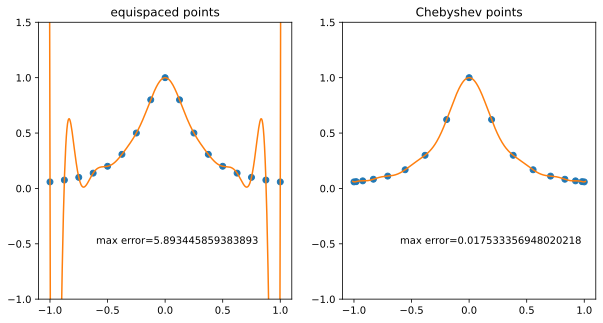

In [20]:
N = 16
xx = linspace(-1.01,1.01,400,True)
figure(figsize=(10,5))
for i in range(2):
    if i==0:
        s = 'equispaced points'; x = -1.0 + 2.0*arange(0,N+1)/N
    if i==1:
        s = 'Chebyshev points'; x = cos(pi*arange(0,N+1)/N)
    subplot(1,2,i+1)
    u = 1.0/(1.0 + 16.0*x**2)
    uu = 1.0/(1.0 + 16.0*xx**2)
    p = polyfit(x,u,N)
    pp= polyval(p,xx)
    plot(x,u,'o',xx,pp)
    axis([-1.1, 1.1, -1.0, 1.5])
    title(s)
    error = norm(uu-pp, inf)
    text(-0.6,-0.5,'max error='+str(error))
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 9. Degree $\,N\,$ interpolation of $\,u(x)\,=\,1/(1+16x^2)\,$ in $N+1$ equispaced and Chebyshev points for $\,N=16\,$. With increasing $\,N\,$, the errors increase exponentially in the equispaced case ${}-{}$ the Runge phenomenon ${}-{}$ whereas in the Chebyshev case they decrease exponentially.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 10 : Polynomials and corresponding equipotential curves

Interpolation using Chebyshev points, but without using the function _Cheb_.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Plot potential $\,\phi\,$ as given by the integral

$$\phi(z)\,=\,\int_{-1}^1\,\rho(x)\,\textrm{log}|z-x|\,dx$$

For equispaced points, develop this as 

$$\phi(z)\,=\,-1\,+\,\frac{1}{2}\textrm{Re}((z+1) \textrm{log}(z+1)\,-\,(z-1)\textrm{log}(z-1))$$

and for Chebyshev points as

$$\phi(z)\,=\,\textrm{log}\frac{|z\,-\,\sqrt{z^2-1}|}{2}$$








</font>
</div>

In [21]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,linspace,arange,abs,cos,poly,polyval,meshgrid,real,imag
from matplotlib.pyplot import figure,subplot,plot,title,axis,contour



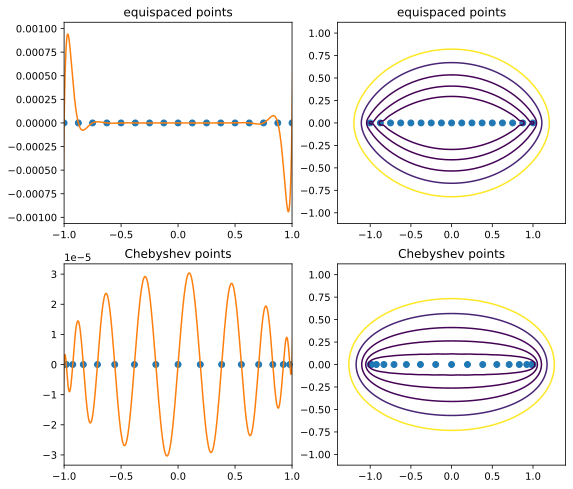

In [23]:
N = 16
figure(figsize=(9,8))
for i in range(2):
    if i==0:
        s = 'equispaced points'; x = -1.0 + 2.0*arange(0,N+1)/N
    if i==1:
        s = 'Chebyshev points'; x = cos(pi*arange(0,N+1)/N)
    p = poly(x)
    # Plot p(x)
    xx = linspace(-1.01,1.01,400,True)
    pp = polyval(p,xx)
    fig = subplot(2,2,2*i+1)
    plot(x,0*x,'o',xx,pp)
    fig.set_xlim(-1,1)
    title(s)
    
    # Plot equipotential curves
    subplot(2,2,2*i+2)
    plot(real(x),imag(x),'o')
    axis([-1.4,1.4,-1.12,1.12])
    xgrid = linspace(-1.4,1.4,250,True)
    ygrid = linspace(-1.12,1.12,250,True)
    xx,yy = meshgrid(xgrid,ygrid)
    zz = xx + 1j*yy
    pp = polyval(p,zz)
    levels = 10.0**arange(-4,1)
    contour(xx,yy,abs(pp),levels)
    title(s)
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output 10. On the left, the degree 17 monic polynomials with equispaced and Chebyshev roots. On the right, some level curves of the corresponding potentials in the complex plane. Chebyshev points are good because they generate a potential for which $\,[-1,1]\,$ is approximately a level curve.

</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Relevant comments pertaining to Programs 9 and 10. Grid points for polynomial spectral methods should lie approximately in a minimal-energy configuration associated with inverse linear repulsion between points. On [-1,1], this means clustering near $\,x\,=\,\pm 1\,$ according to the Chebyshev distribution. For a function $\,u\,$ analytic on $\,[-1,1]\,$, the corresponding spectral derivatives converge geometrically, with an asymptotic convergence factor determined by the size of the largest ellipse about $\,[-1,1]\,$ in which $\,u\,$ is analytic.

</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 11 : Chebyshev differentiation of a smooth function

Note: Whereas the important _cheb_ function is imported as a local module in the original program by CPraveen, it is accessed natively here.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The text includes a theorem which constructs a Chebyshev differentiation matrix. Remarkably, the theorem can generalize the structure of the matrix in only four text lines. Transforming the theorem into a graphic diagram results in the figure below.

In subsequent Programs, it will be the job of the cheb function to manufacture the matrix on demand.


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Use the function _cheb_ to differentiate the function $u(x)\,=\,e^x\,\textrm{sin}(5x)\,$.


</font>
</div>

In [27]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import linspace,exp,sin,dot
from matplotlib.pyplot import figure,subplot,plot,title
#from chebPy import *



In [28]:
from numpy import pi,cos,arange,ones,tile,dot,eye,diag

def cheb(N):
    '''Chebushev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = cos(pi*arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = dot(c, 1.0/c.T) / (dX+eye(N+1))
    D      = D - diag( D.sum(axis=1) )
    return D,x



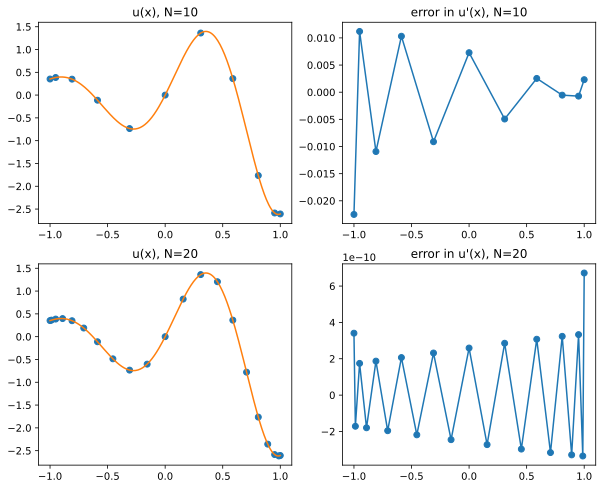

In [29]:
xx = linspace(-1.0,1.0,200,True)
uu = exp(xx)*sin(5.0*xx)
c = 1; figure(figsize=(10,8))
for N in [10,20]:
    D,x = cheb(N); u = exp(x)*sin(5.0*x)
    subplot(2,2,c); c += 1
    plot(x,u,'o',xx,uu)
    title('u(x), N='+str(N))
    
    error = dot(D,u) - exp(x)*(sin(5.0*x)+5.0*cos(5.0*x))
    subplot(2,2,c); c += 1
    plot(x,error,'o-')
    title('error in u\'(x), N='+str(N))
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Above: Output of Program 11 : The vertical scale demonstrates the great reduction in the magnitude of the error with increasing $\,N\,$.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 12. Accuracy of Chebyshev spectral differentiation.

The program is analagous to Program 7 in that it investigates the accuracy of spectral differentiation. The functions used are somewhat different however.  Here they are: $\,|x^3|, \textrm{exp}(-x^{-2}), 1/(1+x^2)\,$, and $\,x^{10}$. The first has a third derivative of bounded variation, the second is smooth but not analytic, the third is analytic in a neighborhood of $\,[-1,1]\,$, and the fourth is a polynomial, the analogue for Chebyshev spectral methods of a band-limited function for Fourier spectral methods. 


</font>
</div>

In [30]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,abs,dot,exp
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis,grid
#from chebPy import *



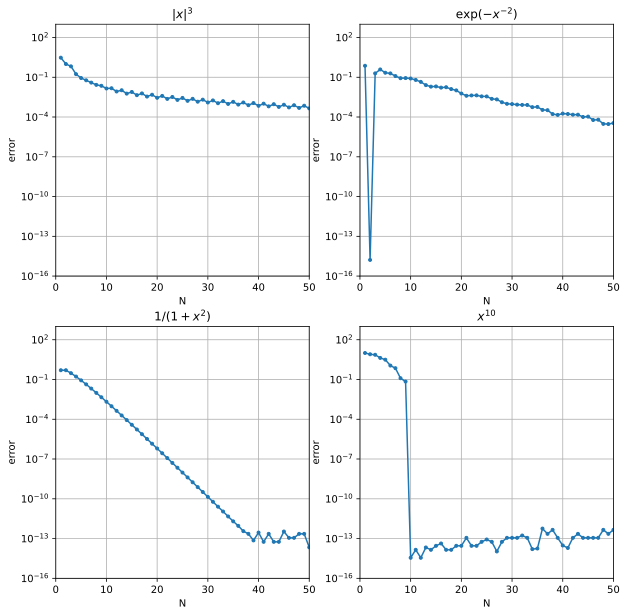

In [31]:
Nmax = 50
E = zeros((4,Nmax))
for N in range(1,Nmax+1):
    D,x = cheb(N)
    
    v = abs(x)**3          # 3rd deriv in BV
    vprime = 3.0*x*abs(x)
    E[0][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-(x+1.0e-15)**(-2))   # C-infinity
    vprime = 2.0*v/(x+1.0e-15)**3
    E[1][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+x**2)     # analytic in a [-1,1]
    vprime = -2.0*x*v**2
    E[2][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = x**10
    vprime = 10.0*x**9   # polynomial
    E[3][N-1] = norm(dot(D,v)-vprime,inf)


titles = ["$|x|^3$", "$\exp(-x^{-2})$", \
          "$1/(1+x^2)$", "$x^{10}$"]
figure(figsize=(10,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(1,Nmax+1,),E[iplot][:],'.-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])
    grid('on')
    
    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Relevant comments pertaining to Programs 11 and 12. The entries of the Chebyshev differentiation matrix $\,D_N\,$ can be computed by explicit formulas, which can be conveniently collected in the short function _cheb_. More general explicit formulas can be used to construct the differentiation matrix for an arbitrarily prescribed set of distinct points $\,\{x_j\}\,$.


</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 13 : Solve linear BVP


</font>
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Solve the BVP 

$$u_{xx}\,=\,e^{4x},\hspace{2 cm}-1<\,x\,<1,\hspace{2 cm}u(\pm1)\,=\,0$$

This is a poisson equation, with solution $\,u(x)\,=\,[e^{4x}\,-\,x\,\textrm{sinh}(4)\,-\,\textrm{cosh}(4)]/16$.


</font>
</div>

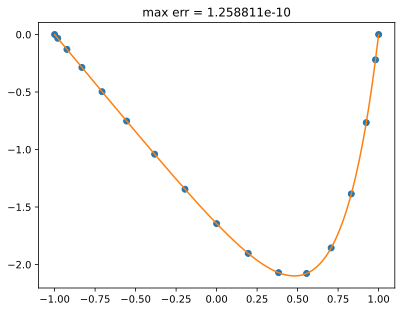

In [32]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
#from chebPy import *
from numpy import dot,exp,zeros,sinh,cosh,max,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from scipy.linalg import solve
from matplotlib.pyplot import title,plot

N = 16
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]
f = exp(4.0*x[1:N])
u = solve(D2,f)
s = zeros(N+1)
s[1:N] = u

xx = linspace(-1.0,1.0,200)
uu = polyval(polyfit(x,s,N),xx)    # interpolate grid data
exact = (exp(4.0*xx) - sinh(4.0)*xx - cosh(4.0))/16.0
maxerr = norm(uu-exact,inf)

title('max err = %e' % maxerr)
plot(x,s,'o',xx,exact);



<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 15px 5px 10px 5px;
            border: 10px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>Solve the BVP 

$$u_{xx}\,=\,e^u,\hspace{2 cm}-1<\,x\,<1,\hspace{2 cm}u(\pm1)\,=\,0$$




</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Program 14 : Solve nonlinear BVP. Because of the nonlinearity, it is no longer enough simply to invert the second-order differentiation matrix $\tilde{D}_N^2$. Instead, the problem can be solved iteratively. An initial guess is chosen, such as a vector of zeros, and then by repeated iteration the system of equations is solved

$$\tilde{D}_N^2 \,v_{\textrm{new}}\,=\,\textrm{exp}(v_{\textrm{old}}),$$

where $\,\textrm{exp}(v)\,$ is the column vector defined componentwise by $\,(\textrm{exp}(v))_j\,=\,e^{v_j}\,$. Program 14 implements this iteration with a crude stopping criterion, and convergence occurs in 29 steps.



</font>
</div>

In [33]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import dot,exp,zeros,linspace,polyval,polyfit,inf
from numpy.linalg import norm
#from chebPy import cheb
from scipy.linalg import solve
from matplotlib.pyplot import title,plot



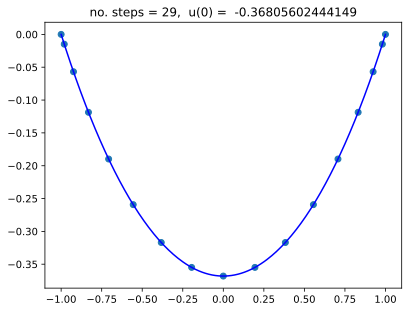

In [34]:
N = 16 # N must be even
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

u = zeros(N-1)
err = zeros(N-1)
change, it = 1.0, 0

while change > 1.0e-15:
    unew = solve(D2,exp(u))
    change = norm(unew-u, inf)
    u = unew
    it += 1

# Add bounday values to u vector
s = zeros(N+1); s[1:N] = u; u = s;

xx = linspace(-1.0,1.0,201)
uu = polyval(polyfit(x,u,N),xx)    # interpolate grid data

title('no. steps = %d,  u(0) = %18.14f' %(it,u[N//2]) )
plot(x,u,'o',xx,uu,'b');



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 100;
            padding: 10px 5px 10px 5px; 
            border: 10px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The text's convergence position (Matlab, remember) after its 29 steps is $u(0)\,=\,-36805602444149$, the same as the Python solution.


</font>
</div>